# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

df.describe() #no header but correct number of features (age, year of operation, nodes detected, survival status)

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [84]:
df.isna().sum() #no NaN values

0    0
1    0
2    0
3    0
dtype: int64

In [85]:
df.rename(columns={0: 'Age', 1: 'YoO', 2:'Nodes Detected', 3: 'Survival Status'}, inplace=True)

df.columns

Index(['Age', 'YoO', 'Nodes Detected', 'Survival Status'], dtype='object')

In [86]:
df['Survival Status']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      2
8      2
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    2
282    1
283    1
284    1
285    2
286    2
287    1
288    1
289    1
290    1
291    1
292    1
293    2
294    1
295    1
296    1
297    1
298    1
299    2
300    1
301    1
302    1
303    1
304    2
305    2
Name: Survival Status, Length: 306, dtype: int64

In [87]:
df['Survival Status'] = df['Survival Status'].replace({1: 0, 2: 1})

In [88]:
df.head()

,Age,YoO,Nodes Detected,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


In [89]:
df['Survival Status']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      1
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     0
26     0
27     0
28     0
29     0
      ..
276    0
277    0
278    0
279    0
280    0
281    1
282    0
283    0
284    0
285    1
286    1
287    0
288    0
289    0
290    0
291    0
292    0
293    1
294    0
295    0
296    0
297    0
298    0
299    1
300    0
301    0
302    0
303    0
304    1
305    1
Name: Survival Status, Length: 306, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [90]:
df.describe()

,Age,YoO,Nodes Detected,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [146]:
node_bins = pd.cut(df['Nodes Detected'], 5)
age_bins_5 = pd.cut(df['Age'], 5)
pd.crosstab(node_bins, age_bins_5)

Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Nodes Detected,,,,,
"(-0.052, 10.4]",38,85,83,51,9
"(10.4, 20.8]",3,11,7,5,0
"(20.8, 31.2]",2,2,4,3,0
"(31.2, 41.6]",0,0,1,0,0
"(41.6, 52.0]",0,1,1,0,0


In [121]:
pd.crosstab(df['Survival Status'], age_bins_5, normalize='columns')  #30-40 had a markedly better survival rate.

Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Survival Status,,,,,
0,0.906977,0.686869,0.71875,0.728814,0.666667
1,0.093023,0.313131,0.28125,0.271186,0.333333


In [123]:
age_bins_2 = pd.cut(df['Age'], 2)  
pd.crosstab(df['Survival Status'], age_bins_2, normalize='columns') #Age doesn't seem to be a determinant of survival.

Age,"(29.947, 56.5]","(56.5, 83.0]"
Survival Status,,
0,0.730964,0.743119
1,0.269036,0.256881


In [124]:
pd.crosstab(df['Survival Status'], node_bins, normalize='columns')

Nodes Detected,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Survival Status,,,,,
0,0.781955,0.423077,0.454545,0.0,0.5
1,0.218045,0.576923,0.545455,1.0,0.5


In [125]:
YoO_bins = pd.cut(df['YoO'], 4) 
pd.crosstab(df['Survival Status'], YoO_bins, normalize='columns')

YoO,"(57.989, 60.75]","(60.75, 63.5]","(63.5, 66.25]","(66.25, 69.0]"
Survival Status,,,,
0,0.725275,0.772152,0.689655,0.77551
1,0.274725,0.227848,0.310345,0.22449


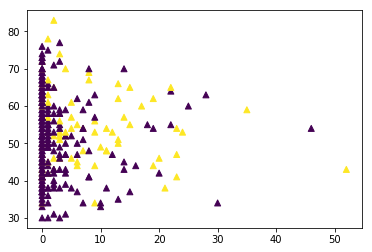

In [143]:
plt.scatter(df['Nodes Detected'], df['Age'], c=df['Survival Status'], marker='^')
plt.show();

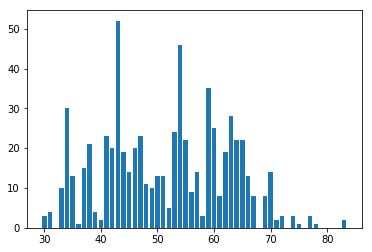

In [142]:
plt.bar(df['Age'], df['Nodes Detected'])
plt.show();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?

    Fewer nodes detected seems to have the strongest correlation with
    with survival.

- What is at least one feature that looks to have a negative correlation with survival?

    Age, though minorly, seems to be negative correlated with survival.  The youngest age group fared better the others.

- How are those two features related with each other, and what might that mean?

    Younger patients may have had marginally fewer nodes detected but given this data that isn't clear. Youth (the youngest quintile of participants) fared better than the other groups but the strongest indicator of death was the number of nodes found.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.